# Let's map some earthquakes!

Use this notebook to complete your final project for unit 4. You'll create a dataframe for the data you downloaded and then plot the earthquakes using latitude and longitude. You'll also create functions to make your code more efficient.

Import the libraries you need here:

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

This code adds an image behind your plot:

In [3]:
image = plt.imread("earth.jpg")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])

Create your data frame:

In [31]:
import pandas as pd
df= pd.read_csv("earthquake_data.csv")
df.head()

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
0,9925,Tsu,1900,1.0,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2567,NaN,1900,1.0,14.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0
2,2575,NaN,1900,7.0,29.0,6.0,59.0,NaN,33.0,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6232,Tsu,1900,9.0,10.0,21.0,30.0,NaN,NaN,6.6,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
4,6234,Tsu,1900,9.0,17.0,21.0,45.0,NaN,NaN,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Try plotting your earthquakes!
Hint: You will need to use the "LATITUDE" and "LONGITUDE" columns

You will also need xlim and ylim to focus the map on your region. Use the following limits:
- North America: xlim = (-180,-50), ylim = (0,90)
- Central America: xlim = (-100,-70), ylim = (0,25)
- South America: xlim = (-120,-20), ylim = (-60,20)
- Africa: xlim = (-25,50), ylim = (-40,45)
- Pacific: xlim = (80,180), ylim = (-70,30)

In [5]:
#assigning columns to variables
lat= df["LATITUDE"]
lat.head()
long= df["LONGITUDE"]
long.head()

0    127.25
1    106.96
2    165.00
3    152.00
4    148.00
Name: LONGITUDE, dtype: float64

In [6]:
def quakePlot (longitude,latitude,color="green"):
     plt.scatter(long,lat,color="green")


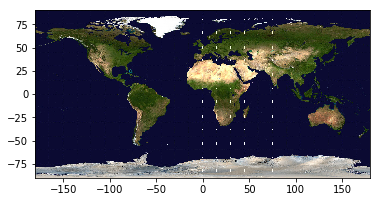

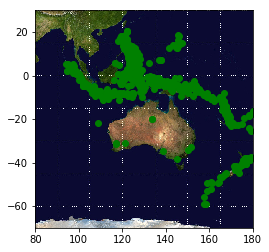

In [7]:
image = plt.imread("earth.jpg")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])
quakePlot (long,lat)
plt.xlim(80,180)
plt.ylim(-70,30)
plt.show()

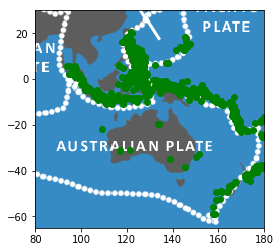

In [8]:
image = plt.imread("plates.png")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])
quakePlot (long,lat)
plt.xlim(80,180)
plt.ylim(-65,30)
plt.show()

Replace your (image = plt.imread("earth.jpg")) code with the following and see what happens:
image = plt.imread("plates.png")

What do you notice?

### Let's add some color (and functions)
Next, you'll need to color code your points based on one of the characteristics in the data frame. 

First, create a function that takes the name of a column and a number of colors and returns list of intermediate values based on the number of colors you specify (these values will be the boundaries for conditionals later on).

In [9]:
mag=df["EQ_PRIMARY"]
mag2=mag.dropna()
print(mag2.min())
print(mag2.max())

3.1
9.1


In [10]:
#print(mag2)

In [11]:
def colorFunc(column, numColor):
    int_list = []
    num_range = column.max() - column.min()
    interval = num_range/numColor
    nump_temp= column.min()
    while len(int_list) < numColor:
        nump_temp += interval
        int_list.append(nump_temp)
    return int_list

mylist= colorFunc(df["EQ_PRIMARY"], 10)
print(mylist)

[3.7000000000000002, 4.2999999999999998, 4.8999999999999995, 5.4999999999999991, 6.0999999999999988, 6.6999999999999984, 7.299999999999998, 7.8999999999999977, 8.4999999999999982, 9.0999999999999979]


Next, you will make your own version of the colormap we used to color the stars in the astrophysics unit. You will need to make a list that contains a color for each value of the characteristic you have chosen. Think back to the climate change unit for ideas...

You should create a function that takes the name of your characteristic column and a list of RGB value lists and creates a list of values for the "colormap".

Hint: You will need to use the last function you created. You can call this function inside of your new function.

In [12]:
def Func(column):
    mylist= colorFunc(df["EQ_PRIMARY"], 10)    
    colors=[]
    for value in column:
        if value <=mylist[0]:
            colors.append([237/255,18/255,18/255])
        elif value <=mylist[1]:
            colors.append([234/255,32/255,32/255])
        elif value <=mylist[2]:
            colors.append([232/255,44/255,44/255])
        elif value <=mylist[3]:
            colors.append([232/255,58/255,58/255])
        elif value <=mylist[4]:
            colors.append([242/255,72/255,72/255])
        elif value <=mylist[5]:
            colors.append([244/255,83/255,83/255])
        elif value <=mylist[6]:
            colors.append([249/255,99/255,99/255])
        elif value <=mylist[7]:
            colors.append([237/255,120/255,120/255])
        elif value <=mylist[8]:
            colors.append([234/255,143/255,143/255])
        elif value <=mylist[9]:
            colors.append([239/255,170/255,170/255])
        else:
            colors.append([255/255, 255/255, 255/255])
    return colors
colormap= Func(mylist)
print(colormap)

[[0.9294117647058824, 0.07058823529411765, 0.07058823529411765], [0.9176470588235294, 0.12549019607843137, 0.12549019607843137], [0.9098039215686274, 0.17254901960784313, 0.17254901960784313], [0.9098039215686274, 0.22745098039215686, 0.22745098039215686], [0.9490196078431372, 0.2823529411764706, 0.2823529411764706], [0.9568627450980393, 0.3254901960784314, 0.3254901960784314], [0.9764705882352941, 0.38823529411764707, 0.38823529411764707], [0.9294117647058824, 0.47058823529411764, 0.47058823529411764], [0.9176470588235294, 0.5607843137254902, 0.5607843137254902], [0.9372549019607843, 0.6666666666666666, 0.6666666666666666]]


Next, plot your graph again, adding the argument c = your "colormap" to the scatterplot function:

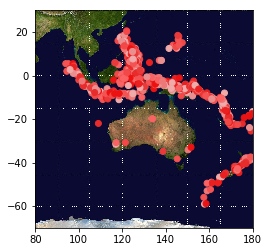

In [13]:
# You will need to run this code again first
image = plt.imread("earth.jpg")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])
plt.scatter(long, lat, c=colormap)
plt.xlim(80,180)
plt.ylim(-70,30)
plt.show()

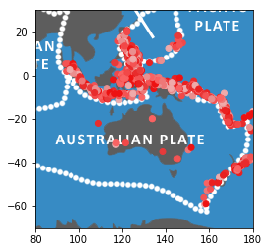

In [14]:
image = plt.imread("plates.png")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])
plt.scatter(long, lat, c=colormap)
plt.xlim(80,180)
plt.ylim(-70,30)
plt.show()

Replace your (image = plt.imread("earth.jpg")) code with the following and see what happens:
image = plt.imread("plates.png")

What do you notice?

### Challenge: 
Change the size of your markers based on a second characteristic

In [15]:
def sizeFunc(column, numSize):
    empty_list = []
    interval = (column.max()- column.min())/numSize
    num_temp = column.min()
    while len(empty_list) < numSize:
        num_temp += interval
        empty_list.append(num_temp)
    return empty_list

sizeFunc(df["DEATHS"], 5)

[1200.8, 2400.5999999999999, 3600.3999999999996, 4800.1999999999998, 6000.0]

In [16]:
death = df["DEATHS"]
def Func(column):
    empty_list = sizeFunc(df["DEATHS"], 5)
    sizes = []
    for item in column:
        if item <= empty_list[0]:
            sizes.append(10)
        elif item <= empty_list[1]:
            sizes.append(50)
        elif item <= empty_list[2]:
            sizes.append(100)
        elif item <= empty_list[3]:
            sizes.append(150)
        elif item <= empty_list[4]:
            sizes.append(200)
    return sizes
           
s = Func(death)

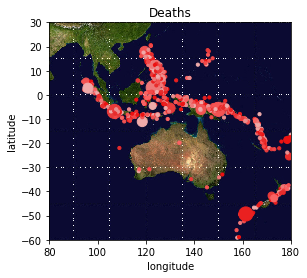

In [17]:
image = plt.imread("earth.jpg")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])
plt.scatter(long,lat,c=colormap,s=s)
plt.xlim(80,180)
plt.ylim(-60,30)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Deaths")
plt.show()

In [18]:
max(mag2)

9.0999999999999996

In [22]:
print(df["I_D"].loc[df["EQ_PRIMARY"]==9.0999999999999996])

557    5823
Name: I_D, dtype: int64


In [26]:
id=df["I_D"]

In [30]:
print(id[557])

5823


In [35]:
print(df[557:558])

      I_D FLAG_TSUNAMI  YEAR  MONTH   DAY  HOUR  MINUTE  SECOND  FOCAL_DEPTH  \
557  5823          Tsu  2004   12.0  26.0   0.0    58.0    53.4         30.0   

     EQ_PRIMARY               ...                 TOTAL_MISSING  \
557         9.1               ...                           NaN   

     TOTAL_MISSING_DESCRIPTION  TOTAL_INJURIES  TOTAL_INJURIES_DESCRIPTION  \
557                        NaN             NaN                         3.0   

     TOTAL_DAMAGE_MILLIONS_DOLLARS  TOTAL_DAMAGE_DESCRIPTION  \
557                        10000.0                       4.0   

     TOTAL_HOUSES_DESTROYED TOTAL_HOUSES_DESTROYED_DESCRIPTION  \
557                     NaN                                3.0   

    TOTAL_HOUSES_DAMAGED TOTAL_HOUSES_DAMAGED_DESCRIPTION  
557                  NaN                              NaN  

[1 rows x 47 columns]
